# Predicting Metro Interstate Traffic Volume: A Time Series Forecasting Approach with ARIMA


### KJ MoChroi
**Department of Data Science, Bellevue University**  
**DSC680: Applied Data Science**  
**Dr. Brett Werner**  
**Spring 2023**  

Dataset: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

### Import and View Data

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# import dataset and preview
df = pd.read_csv("Potential_Datasets/Metro_Interstate_Traffic_Volume.csv.gz", compression='gzip')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
# Let's make sure 'date' is actually a date in pandas
df["date_time"] = pd.to_datetime(df["date_time"])

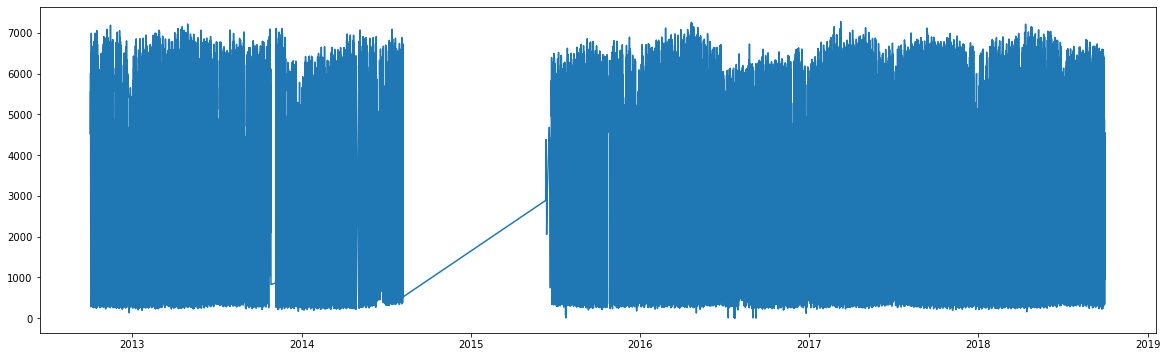

In [4]:
# plot the dataset
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df["date_time"], df["traffic_volume"]);

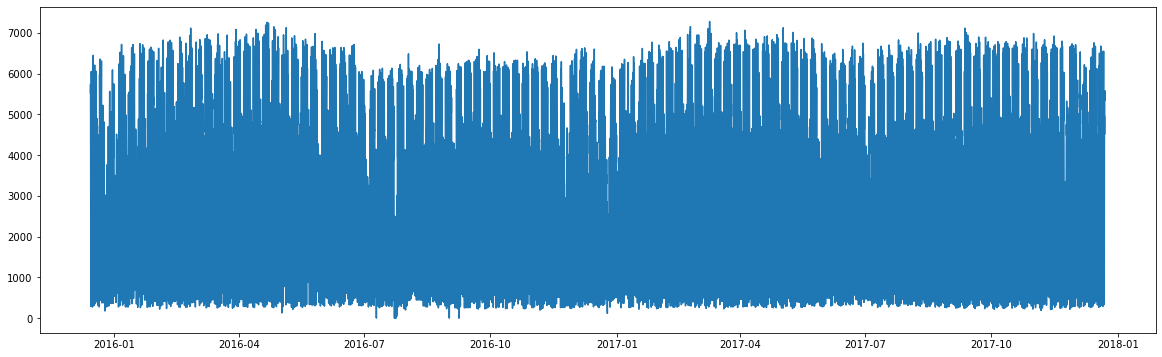

In [5]:
# plot the dataset
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df["date_time"][20000:40000], df["traffic_volume"][20000:40000]);

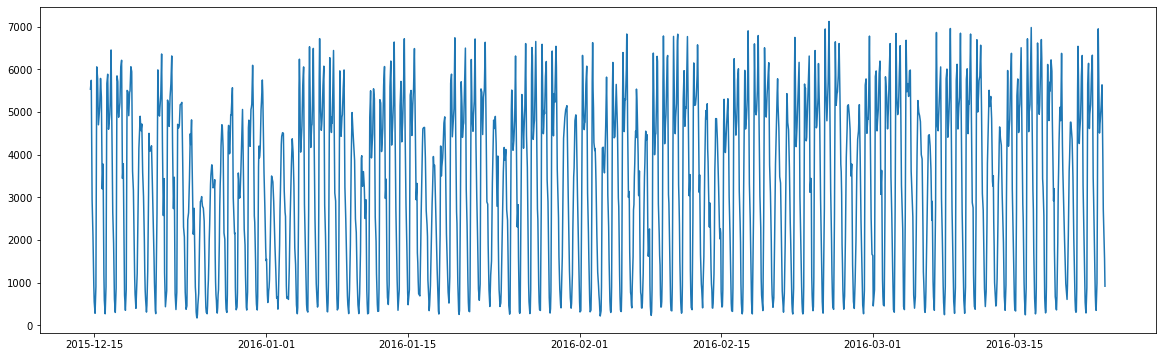

In [6]:
# plot the dataset
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df["date_time"][20000:22000], df["traffic_volume"][20000:22000]);

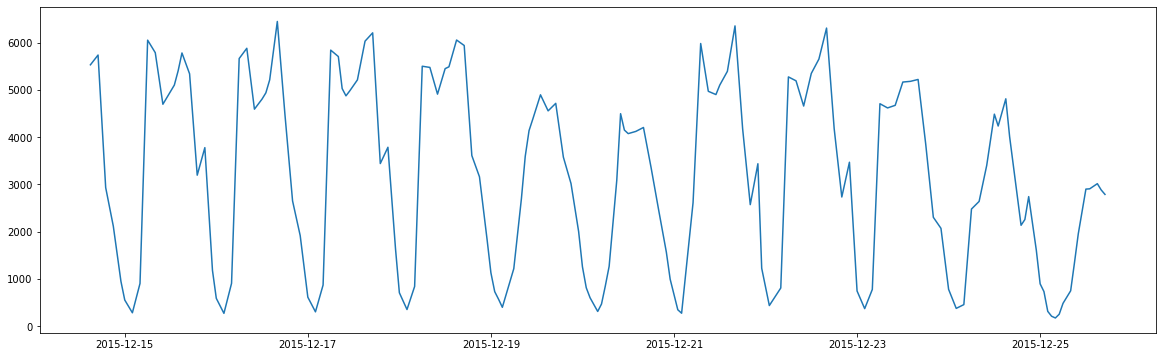

In [7]:
# plot the dataset
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df["date_time"][20000:20200], df["traffic_volume"][20000:20200]);

### Clean Dataset

In [8]:
# drop data prior to 2015 - 07  
df_complete = df[df["date_time"] > '2015-07-01 09:00:00']

In [9]:
df_complete.shape

(32038, 9)

In [10]:
# set index
df_complete2 = df_complete.set_index('date_time')  
df_complete2.index = pd.DatetimeIndex(df_complete2.index).to_period('H')

In [11]:
# drop variables
target_df = df_complete['traffic_volume']
target_df.head()

16166    4273
16167    4469
16168    4625
16169    4462
16170    4996
Name: traffic_volume, dtype: int64

### Checking Stationarity with Augmented Dicky-Fuller Test  

https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
series = target_df.values

In [14]:
# ADF Test
result = adfuller(series, autolag='AIC')

In [15]:
# cite source here: https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -21.926192
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


# Determining Parameters (p,d,q)

We know d=0 because the time series is stationary.

C:\Users\karli\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


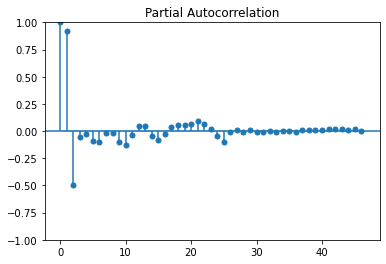

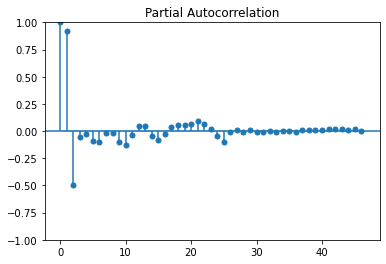

In [16]:
# Finding p (AR Term)
plot_pacf(series)

### Auto ARIMA

In [17]:
! pip install pmdarima --user

In [18]:
from pmdarima.arima import auto_arima

In [19]:
# train and test split
train_size = int(len(target_df) * 0.8)
train = target_df[:train_size]
test = target_df[train_size:]

<AxesSubplot:>

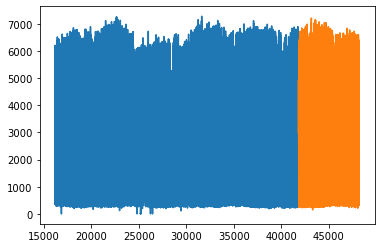

In [20]:
train.plot()
test.plot()

In [21]:
arima_model = auto_arima(train, trace=True, information_criterion='bic', max_order = 5)

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=409019.857, Time=3.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=461602.504, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=415718.150, Time=0.64 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=435734.986, Time=4.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=495255.962, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : BIC=409756.291, Time=2.91 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=409026.840, Time=3.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : BIC=408968.620, Time=13.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : BIC=409009.407, Time=6.50 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : BIC=408904.955, Time=24.20 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : BIC=408990.616, Time=8.81 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : BIC=408307.740, Time=39.89 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : BIC=408794.236, Time=12.31 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : BIC=408604.551, Time=40.86 sec


In [22]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                25630
Model:               SARIMAX(5, 0, 2)   Log Likelihood             -204108.188
Date:                Sun, 07 May 2023   AIC                         408234.376
Time:                        11:52:31   BIC                         408307.740
Sample:                             0   HQIC                        408258.093
                              - 25630                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    548.2602     16.349     33.534      0.000     516.216     580.304
ar.L1          1.8325      0.010    187.205      0.000       1.813       1.852
ar.L2         -1.9355      0.019   -101.544      0.000      -1.973      -1.898
ar.L3          1.2753      0.019     67.209      0.000       1.238       1.313
ar.L4         -0.2299      0.012    -19.206      0.000      -0.253      -0.206
ar.L5         -0.1175      0.006    -20.842      0.000      -0.129      -0.106
ma.L1         -0.5065      0.009    -56.699      0.000      -0.524      -0.489
ma.L2          0.8779      0.009    100.832      0.000       0.861       0.895
sigma2      4.883e+05   3010.923    162.182      0.000    4.82e+05    4.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.85   Jarque-Bera (JB):             39939.19
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\karli\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


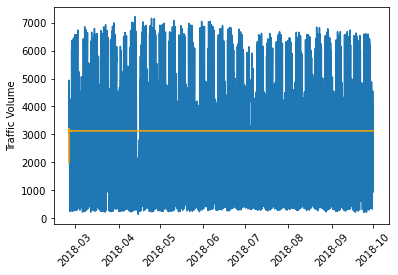

In [28]:
test_plot = df_complete[train_size:]
plt.plot(test_plot['date_time'], test)
plt.plot(test_plot['date_time'], arima_model.predict(n_periods=test.shape[0]), color='orange')
plt.xticks(rotation=45)
plt.ylabel('Traffic Volume')
plt.show()